## 授業評価アンケートのデータ抽出例

pandasの勉強がてら作成．

1. ダウンロードしたExcelファイルをcsv形式で出力
1. pandasのread_csvでDataFrameとして読み込み
1. 使いたい質問を抽出
1. 相関のヒートマップ
1. 各質問の積み上げ棒グラフ(横)を作成

といった感じ．

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts() #fontsリストから使いたいフォントを探しておく
font = fm.FontProperties(fname =  '/Users/momma/Library/Fonts/ipag.ttf')
print(font.get_name() , font.get_family()) #seaborn はfontname, matplotlibはfontnameとfamily
sns.set (font=['IPAGothic']) # なぜか１回だけ実行すると sans selifが出るので2回実行

IPAGothic ['IPAGothic']


### 雑に質問事項だけ抽出 (図書館は複数回答なのでパス)

In [4]:
qah =  pd.read_csv('2018C1.csv', usecols=[12,14,16,18,20,22,24,26,28,30,32,34,36,38,42,44])
hlist = list(qah)

### DataFrameへ読み込み

In [5]:
# dtypeを'category'にするとRでのfactorと同じに扱える
qa = pd.read_csv('2018C1.csv', names=('div','CD','LecName','Lecturer','Season','Day','Time','T','Num','AnsNum',
                                      'AnsTime','Q1','Q1v','Q2','Q2v','Q3','Q3v','Q4','Q4v','Q5','Q5v','Q6','Q6v','Q7','Q7v','Q8','Q8v',
                                     'Q9','Q9v','Q10','Q10v','Q11','Q11v','Q12','Q12v','Q13','Q13v','Q14','Q14v','Q15','Q15v',
                                     'Q16','Q16v','Q17','Q17v','Q18','Q18v'), header=0, dtype='category')
# そのまま読むと数値として扱われる
numqa = pd.read_csv('2018C1.csv', names=('div','CD','LecName','Lecturer','Season','Day','Time','T','Num','AnsNum',
                                      'AnsTime','Q1','Q1v','Q2','Q2v','Q3','Q3v','Q4','Q4v','Q5','Q5v','Q6','Q6v','Q7','Q7v','Q8','Q8v',
                                     'Q9','Q9v','Q10','Q10v','Q11','Q11v','Q12','Q12v','Q13','Q13v','Q14','Q14v','Q15','Q15v',
                                     'Q16','Q16v','Q17','Q17v','Q18','Q18v'), header=0)

### 回答が「全くそう思わない」→「強くそう思う」のものだけ抽出

In [6]:
qlist = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8', 'Q9','Q10','Q11','Q12']
#qlist = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8', 'Q9','Q10','Q11','Q12','Q13','Q14','Q16','Q17']

subnumqa = numqa[qlist]
subnumqa.describe()
subqa = qa[qlist]
subqa.describe()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
count,142,142,142,142,142,142,142,142,142,142,142,142
unique,4,4,5,5,5,5,5,5,5,5,5,5
top,4,4,4,4,5,4,4,4,4,4,4,3
freq,92,68,76,62,65,72,71,77,55,75,70,56


### とりあえず相関のヒートマップ

/Users/momma/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


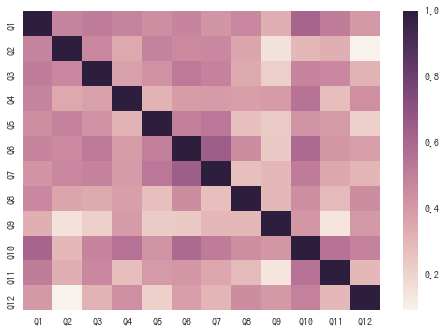

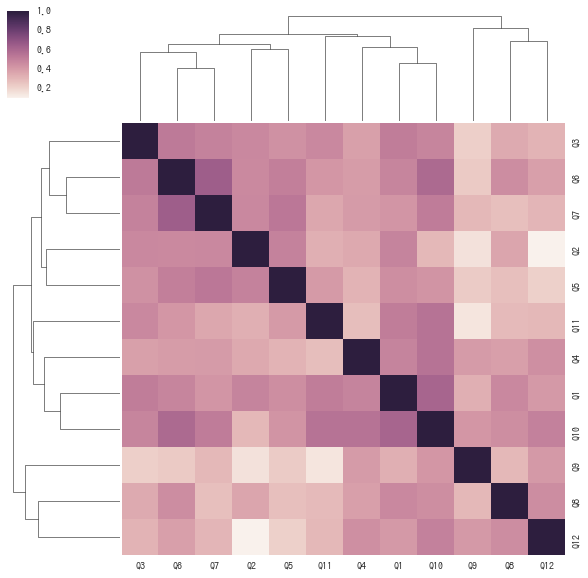

In [7]:
sns.heatmap(subnumqa.corr())
sns.clustermap(subnumqa.corr())

/Users/momma/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


[Text(0.5,0,'授業は学習目標が達成できるよう適切に行われましたか。')]

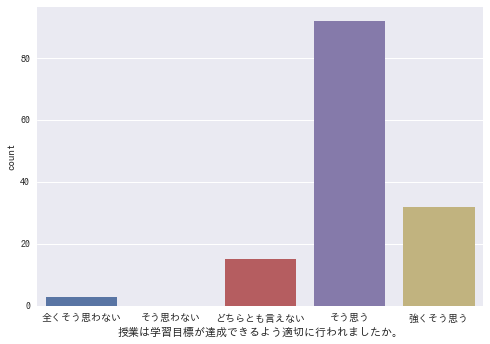

In [8]:
ax = sns.countplot('Q1',data=subqa, order=['1','2','3','4','5']) # hue='Q2'とか入れると質問間での関係性が一応見られる
ax.set_xticklabels(['全くそう思わない', 'そう思わない','どちらとも言えない', 'そう思う', '強くそう思う']) #0から必要
ax.set(xlabel=hlist[0])

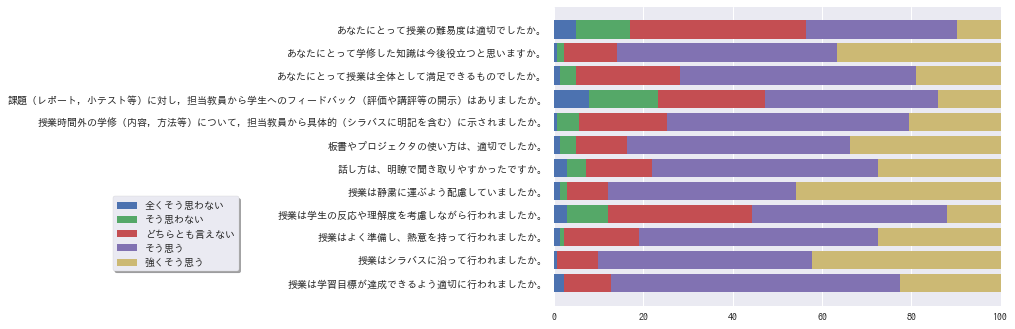

In [9]:
# columnごとに比率を求めるにはapplyでvalue_countsをすると一気に取れる(頻度0はNaNになる)
totalbar = subqa.apply(pd.value_counts)
totalbar = totalbar.fillna(0)
totalbar = totalbar *100/142.0
anslist = ['全くそう思わない', 'そう思わない','どちらとも言えない', 'そう思う', '強くそう思う']

# 積み上げ棒グラフのところはまんま
# https://bunseki-train.com/python_barplot_and_stack_plot_with_color_change/
# を使わせて貰う

fig, ax = plt.subplots()
nQ = len(totalbar.columns)
ticks = np.arange(nQ)
left_data = pd.Series(np.zeros(nQ), index = totalbar.columns.tolist())
for i in range(len(totalbar.index)):
    bar_list = ax.barh(ticks, totalbar.iloc[i], left=left_data)
    left_data += totalbar.iloc[i]
    ax.set_xlim([0,100])
    ax.set_yticks(ticks)
    ax.set_yticklabels(hlist)
ax.legend(anslist, loc='lower left', shadow=True,  frameon=True, bbox_to_anchor=(-1.0, 0.1, 0.5, 0.9))

